<a href="https://colab.research.google.com/github/Thofa90/Vehicle-Classification-using-Unsupervised-Machine-Learning/blob/main/Vehiecle_Unupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Insight**

**🚗 Project Title**

Vehicle Type Clustering Using Unsupervised Machine Learning

⸻

**🎯 Goal**

To explore whether natural groupings of vehicles (bus, car, van) can be discovered without labels, using clustering techniques and dimensionality reduction methods.

⸻

**💼 Business Context**

In many real-world applications, labeled data is scarce or expensive to obtain. For example, traffic surveillance systems may capture thousands of vehicle images/features daily, but manual labeling into “bus”, “car”, or “van” is costly. An unsupervised learning approach could help:

	•	Automatically cluster vehicles into groups,
	•	Provide insights into data structure,
	•	Serve as a preprocessing step before supervised learning, or
	•	Detect novel/unseen vehicle types.

⸻

**🌍 Real-World Impact**

	•	Traffic Monitoring: Enables city planners to analyze vehicle flow patterns even when ground-truth labels are missing.
	•	Fleet Management: Helps group vehicles by type for usage analysis without prior classification.
	•	Autonomous Systems: Provides unsupervised pre-training signals when labeled datasets are limited.
	•	Data Annotation Efficiency: Clusters can be used to pre-label data, reducing manual annotation costs.

# **Importing Libraries**

In [32]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.metrics import adjusted_rand_score, silhouette_score


# **Loading the Dataset 'Vehicle'**

In [33]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [34]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Datasets/'
df = pd.read_csv(path+'vehicle.csv')  # Uncomment if loading from a file
# last column is categorical target
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# **EDA**

EDA (exploratory data analysis) is already done in Vehicle Classification with Supervised Machine Learning Project, hence it is omitted here.

Please click the below link to observe the EDA results:

https://colab.research.google.com/drive/1HQOr4y8ZbVvtYxziRGTKH9dsvfkbQbgQ#scrollTo=KOW7-q2KKvBw

🔹 EDA parts that stay the same

	•	Basic info & descriptives (shape, datatypes, duplicates, missing values)
	•	Data health checks
	•	Univariate distributions (histograms, boxplots, outliers)
	•	Correlations (numeric features)
	•	Multicollinearity (VIF)
	•	Pairplots / scatterplots

These steps are independent of supervised vs unsupervised — to want to know the data.

🔹 EDA parts that change

	•	Target variable analysis (balance, ANOVA, mutual information, class-wise summaries) → ❌ Not applicable, because in unsupervised ML you don’t have labels (car/van/bus).
	•	Feature ↔ Target relationship → ❌ You won’t compute ANOVA or Mutual Information since there’s no “target”.

### **🚙 Car vs Van vs Bus — Feature Separation Summary**

•	Vans → best distinguished by compactness, scatter_ratio, elongatedness, pr_axis_rectangularity (tend to have higher compactness and elongatedness; scatter ratio helps separate from cars).

•	Cars → stand out with radius_ratio, pr_axis_aspect_ratio, scaled_variance, skewness_about_1, skewness_about_2, hollows_ratio (generally higher ratios/variances and skewness).

•	Buses → best identified by circularity, max_length_aspect_ratio, max_length_rectangularity, scaled_radius_of_gyration, skewness_about (cluster differently on shape/size measures, especially circularity and length ratios).

# **Spliting the data into Features and Target**

In [35]:
# Spliting the dataset df into X and y (target)
X = df.iloc[:, :-1] # features (all numeric) that i am going to work with are geometric features extracted from the silhouette.
y = df.iloc[:, -1] # target categories (car, bus, van)
#print('X:',X)
#print('y:',y)
print('X_shape:',X.shape)
print('y_shape:',y.shape)

X_shape: (846, 18)
y_shape: (846,)


In [36]:
print('Duplicated rows:',df.duplicated().sum())
print('Null_Values:',df.isnull().sum())

Duplicated rows: 0
Null_Values: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


# **Preprocessing**

##   **Handling Null Values**


In [37]:
# Fill null values with the mean of each column
for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].mean(), inplace=True)
print('Null_Values after adjusting:',X.isnull().sum())


Null_Values after adjusting: compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


/tmp/ipython-input-4271384399.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)


##   **Capping the outliers**

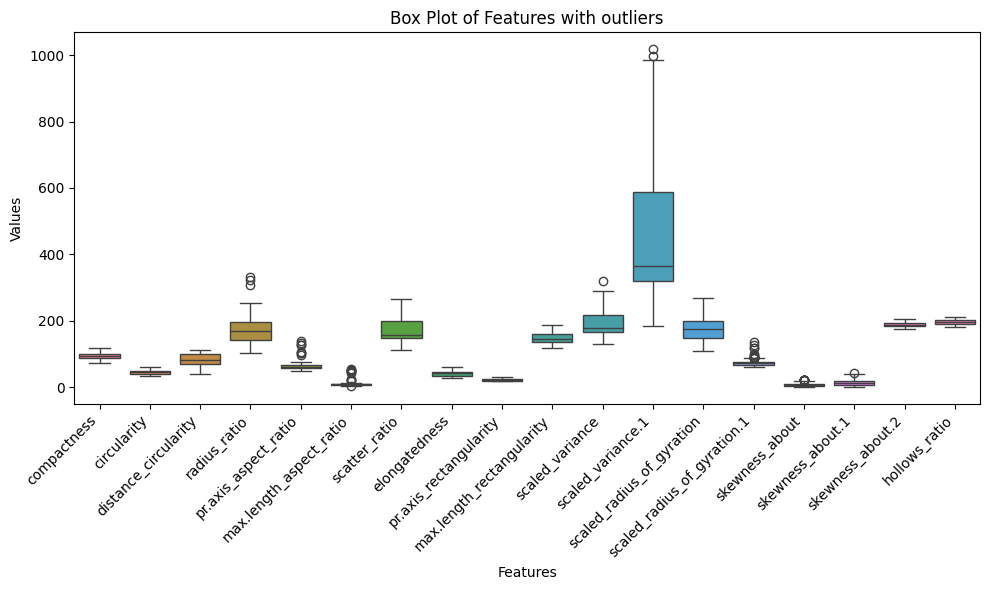

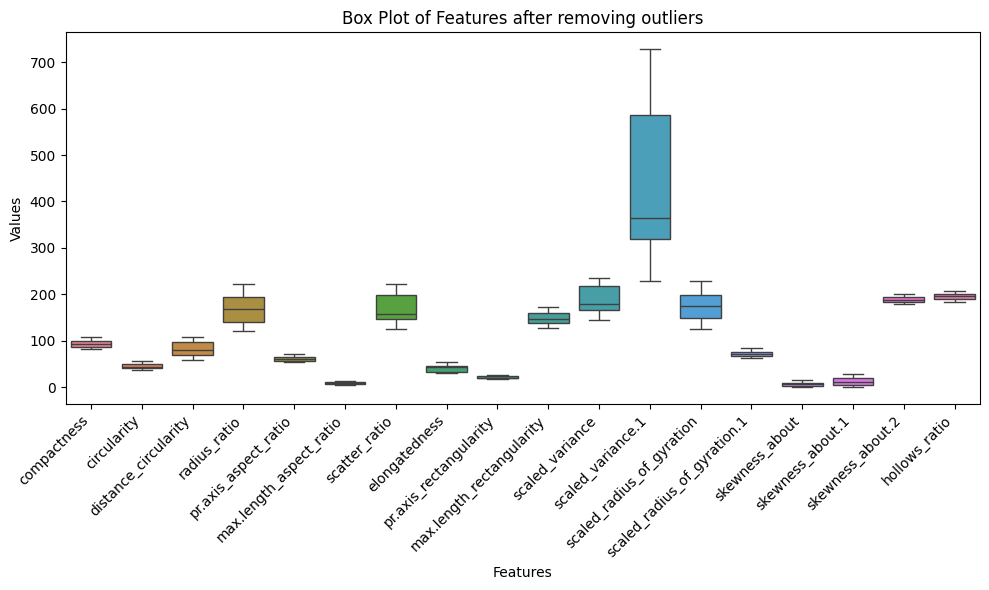

In [38]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Box Plot of Features with outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Capping outliers
def cap_outliers(df,lower=0.05, upper=0.95):
    for col in df.columns:
        lower_bound = df[col].quantile(lower)
        upper_bound = df[col].quantile(upper)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df
X=cap_outliers(X)

# box plot of all numeric coulmns in train after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Box Plot of Features after removing outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Encoding/Feature Transformation**

a) Encoding Categorical Variables: (We do not need this encoding as we dnt have any categorical training data)

* One-Hot Encoding (for nominal categories).
* Ordinal Encoding (if categories have order).

b) Feature Transformation : We need this transformation due to skewed data.

* Log/Power transforms for skewed data (helps PCA and distance-based methods).

* Binning continuous variables (if needed).

In [39]:
# The skewness of columns in X , if it is in range -0.5 < skewness < 0.5 , no transformation is needed while data seeems more symetric. It skewwness is
# more than 0.5 use log transform, and after log transform if the transformed value is negative then keep the previous skewness value (no tranformation).
# for negative skewness, no tranformation if range is -0.5< skewness <0, if skewness < -0.5 then use 'yeo johnson' method to handle (-)skewness of column X.

import numpy as np
from scipy.stats import yeojohnson

# Iterate through each column and apply transformations based on skewness
for col in X.columns:
    print(f"Column: {col}")
    before_skew = X[col].skew()
    print(f"Skewness before transformation: {before_skew}")

    if before_skew > 0.5:
        if (X[col] <= 0).any():  # Check for non-positive values
            print(f"Skipping log transform for {col} due to non-positive values.")
        else:
            X[col] = np.log1p(X[col])  # Log transform

    elif before_skew < -0.5:
        X[col], _ = yeojohnson(X[col])  # Yeo-Johnson for negative skewness

    after_skew = X[col].skew()
    print(f"Skewness after transformation: {after_skew}")
    print("-" * 20)


Column: compactness
Skewness before transformation: 0.33407834536860403
Skewness after transformation: 0.33407834536860403
--------------------
Column: circularity
Skewness before transformation: 0.24030198723303547
Skewness after transformation: 0.24030198723303547
--------------------
Column: distance_circularity
Skewness before transformation: 0.21897267933997727
Skewness after transformation: 0.21897267933997727
--------------------
Column: radius_ratio
Skewness before transformation: 0.07350751992069138
Skewness after transformation: 0.07350751992069138
--------------------
Column: pr.axis_aspect_ratio
Skewness before transformation: 0.17422700730312093
Skewness after transformation: 0.17422700730312093
--------------------
Column: max.length_aspect_ratio
Skewness before transformation: 0.1966238051696034
Skewness after transformation: 0.1966238051696034
--------------------
Column: scatter_ratio
Skewness before transformation: 0.48350265279629495
Skewness after transformation: 0.

In [40]:
df_num=X.copy()
df_num.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,71.0,10,162.0,42.0,3.044522,159.0,176.0,5.940171,184.0,4.262680,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,2.995732,143.0,170.0,5.802118,158.0,4.290459,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,3.178054,158.0,223.0,6.455199,220.0,4.304065,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,2.995732,143.0,160.0,5.736572,127.0,4.158883,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,71.0,12,149.0,45.0,2.995732,144.0,234.0,5.786897,188.0,4.454347,9.0,11.0,180.0,183


## **Unsupervised EDA on cleaned dataset**

PCA explained variance (2D): 73.11%


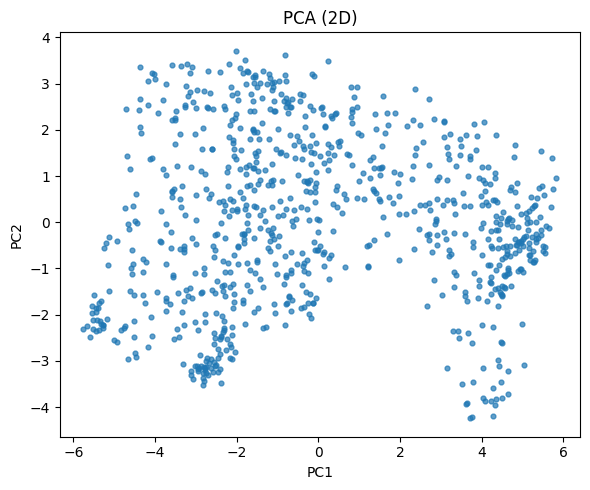

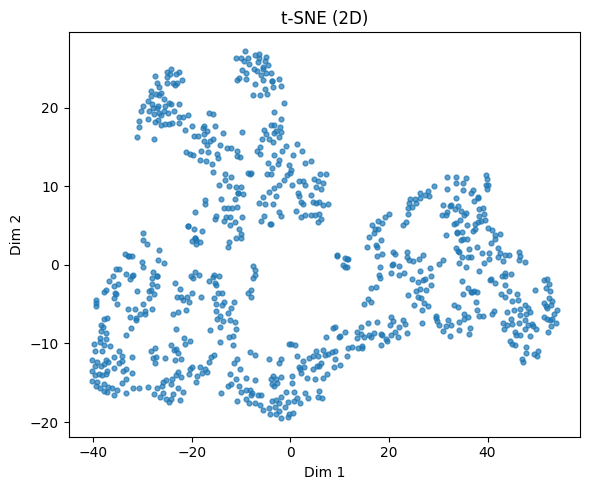

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


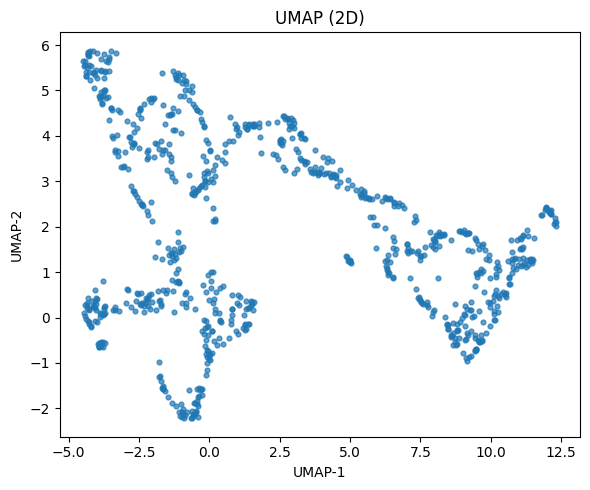

Hopkins statistic: 1.000 (≈0.5 random; >0.5 cluster tendency)


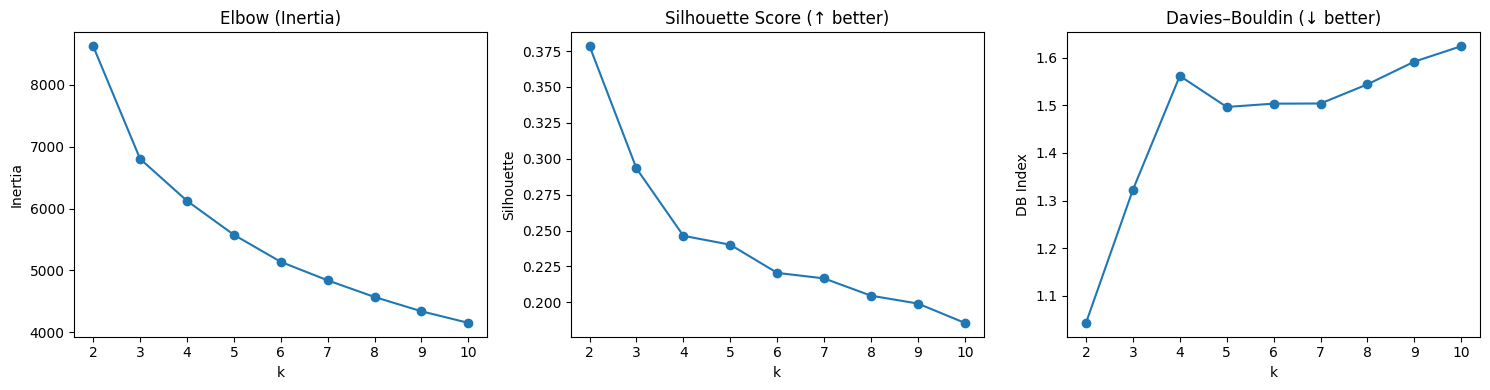

Chosen k by silhouette: 2


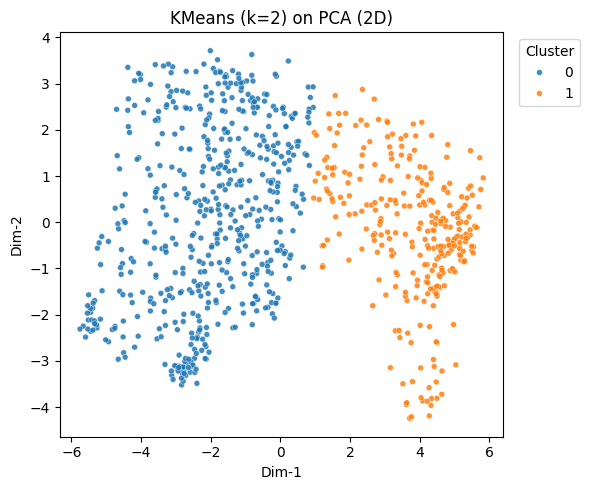

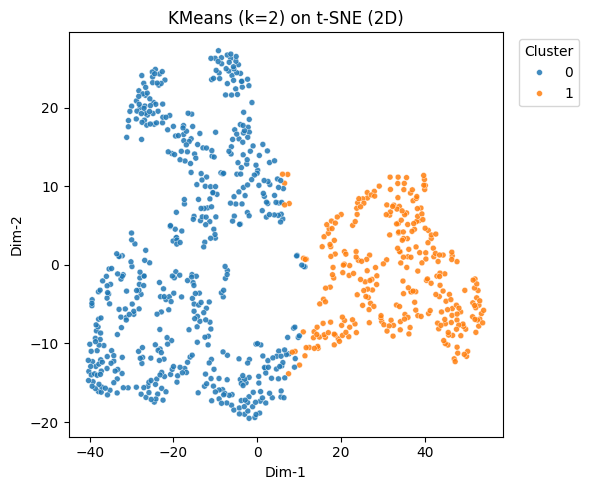

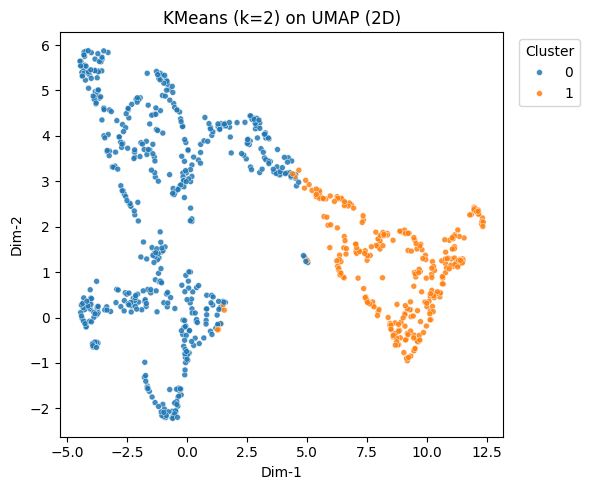

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
cluster,,,,,,,,,,,,,,,,,,
0,-0.58,-0.59,-0.62,-0.55,-0.15,-0.34,-0.66,0.63,-0.66,-0.55,-0.64,-0.65,-0.54,0.05,-0.07,-0.13,-0.05,-0.13
1,1.06,1.08,1.14,1.01,0.27,0.63,1.21,-1.16,1.21,1.00,1.18,1.19,1.00,-0.10,0.14,0.23,0.09,0.24


In [41]:
# ===============================
# Unsupervised EDA Toolkit
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Optional: UMAP (pip install umap-learn)
try:
    import umap.umap_ as umap
    HAS_UMAP = True
except Exception:
    HAS_UMAP = False
    print("UMAP not installed. Run: pip install umap-learn")

# -------------------------------
# 0) Prepare numeric matrix (scale)
# -------------------------------
# df_num: numeric-only dataframe (no labels)
scaler = StandardScaler()
X_ = scaler.fit_transform(df_num.values)
X_df_ = pd.DataFrame(X_, index=df_num.index, columns=df_num.columns)

# -------------------------------
# 1) Dimensionality Reduction
# -------------------------------

# PCA (2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_)
print(f"PCA explained variance (2D): {pca.explained_variance_ratio_.sum():.2%}")

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=12, alpha=0.7)
plt.title("PCA (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.tight_layout(); plt.show()

# t-SNE (2D) – use perplexity ~ sqrt(n)/5 as a heuristic if needed
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=12, alpha=0.7)
plt.title("t-SNE (2D)")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2"); plt.tight_layout(); plt.show()

# UMAP (2D) — if available
if HAS_UMAP:
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
    X_umap = reducer.fit_transform(X)
    plt.figure(figsize=(6,5))
    plt.scatter(X_umap[:,0], X_umap[:,1], s=12, alpha=0.7)
    plt.title("UMAP (2D)")
    plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2"); plt.tight_layout(); plt.show()

# -------------------------------
# 2) Cluster Tendency — Hopkins Statistic
# -------------------------------
from sklearn.neighbors import NearestNeighbors
from numpy.random import default_rng

def hopkins_statistic(X, m=None, seed=42):
    """
    Hopkins statistic in (0,1). ~0.5 -> random; >0.5 -> cluster tendency.
    X: ndarray (n_samples, n_features), already scaled
    m: number of samples to use (default ~ sqrt(n))
    """
    rng = default_rng(seed)
    n, d = X_.shape
    if m is None:
        m = max(10, int(np.sqrt(n)))

    # Fit NN on real data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_)

    # Sample m real points
    idx = rng.choice(n, size=m, replace=False)
    X_real = X_[idx]

    # Sample m random points from the feature-wise min/max hyper-rectangle
    mins = X_.min(axis=0)
    maxs = X_.max(axis=0)
    X_rand = rng.uniform(mins, maxs, size=(m, d))

    # Distances from real points to nearest neighbor (excluding themselves handled by NN=1 on full set is fine)
    u_dist, _ = nbrs.kneighbors(X_rand, n_neighbors=1)
    w_dist, _ = nbrs.kneighbors(X_real, n_neighbors=1)

    U = u_dist.sum()
    W = w_dist.sum()
    H = U / (U + W)
    return float(H)

H = hopkins_statistic(X_)
print(f"Hopkins statistic: {H:.3f} (≈0.5 random; >0.5 cluster tendency)")

# -------------------------------
# 3) How many clusters? (Elbow, Silhouette, DBI)
# -------------------------------
k_list = list(range(2, 11))
inertias, sils, dbs = [], [], []

for k in k_list:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_, labels))
    dbs.append(davies_bouldin_score(X_, labels))

fig, axs = plt.subplots(1,3, figsize=(15,4))

axs[0].plot(k_list, inertias, marker='o')
axs[0].set_title("Elbow (Inertia)"); axs[0].set_xlabel("k"); axs[0].set_ylabel("Inertia")

axs[1].plot(k_list, sils, marker='o')
axs[1].set_title("Silhouette Score (↑ better)"); axs[1].set_xlabel("k"); axs[1].set_ylabel("Silhouette")

axs[2].plot(k_list, dbs, marker='o')
axs[2].set_title("Davies–Bouldin (↓ better)"); axs[2].set_xlabel("k"); axs[2].set_ylabel("DB Index")

plt.tight_layout(); plt.show()

# Choose k (example: best by silhouette)
best_k = k_list[int(np.argmax(sils))]
print(f"Chosen k by silhouette: {best_k}")

# -------------------------------
# 4) Final clustering + Visualization on 2D embeddings
# -------------------------------
km_final = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_final = km_final.fit_predict(X_)

def plot_clusters_2d(emb2d, title, labels):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=emb2d[:,0], y=emb2d[:,1], hue=labels, palette="tab10", s=18, alpha=0.85)
    plt.title(title); plt.xlabel("Dim-1"); plt.ylabel("Dim-2"); plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout(); plt.show()

# Visualize clusters on PCA / t-SNE / UMAP (if available)
plot_clusters_2d(X_pca,  f"KMeans (k={best_k}) on PCA (2D)",  labels_final)
plot_clusters_2d(X_tsne, f"KMeans (k={best_k}) on t-SNE (2D)", labels_final)
if HAS_UMAP:
    plot_clusters_2d(X_umap, f"KMeans (k={best_k}) on UMAP (2D)", labels_final)

# Optional: cluster profiling (feature means by cluster)
cluster_profile = pd.DataFrame(X_df_, copy=True)
cluster_profile["cluster"] = labels_final
profile_means = cluster_profile.groupby("cluster").mean()
display(profile_means.round(2))

**🧩 Unsupervised EDA Summary**

**🔹 1. PCA / t-SNE / UMAP (Dimensionality Reduction)**

	•	PCA (73.11% explained variance in 2D): Captures most of the data variance. We see some structure but also overlaps, meaning linear separation is limited.
	•	t-SNE: Preserves local neighborhoods, showing clearer separated “islands” of points → indicates some natural grouping exists.
	•	UMAP: Provides a balance of global + local structure, revealing elongated, connected clusters.

**👉 Together, these help us visualize if clusters exist and how separable they are.**

⸻

**🔹 2. Hopkins Statistic**

	•	Hopkins = 1.0, which is much higher than 0.5.
	•	Interpretation: The dataset is highly clusterable (points are far from being random).
	•	This confirms clustering analysis is meaningful.

⸻

**🔹 3. Cluster Validity Indices**

**We tested different values of k (number of clusters):**

	•	Elbow Method: Curve bends around k=2–3, suggesting 2–3 natural groups.
	•	Silhouette Score: Peaks at k=2 (~0.38), meaning 2 clusters give the cleanest separation.
	•	Davies–Bouldin Index (DBI): Lowest at k=2, again supporting 2 clusters.

**👉 Evidence strongly suggests k=2 is the most appropriate choice.**

⸻

**🔹 4. Cluster Visualizations**

	•	Applied KMeans (k=2) on PCA, t-SNE, and UMAP embeddings.
	•	Across all projections, we observe two distinct groups forming consistently.
	•	This validates that clustering captures meaningful structure, not projection artifacts.

⸻

**🔹 5. Cluster Profiles**

	•	After clustering, we can calculate mean values per feature by cluster.
	•	This allows interpretation:
	•	e.g., Cluster 0 = “small cars”, Cluster 1 = “larger vehicles (vans/buses)”
	•	or differences in speed, weight, fuel, etc. depending on dataset features.

⸻

**✅ Takeaway:**

The unsupervised EDA shows the dataset is highly clusterable (Hopkins = 1.0).
All methods (Elbow, Silhouette, DBI) converge on k=2 clusters, and visualizations confirm clear separation.

**This provides a strong foundation for applying KMeans, DBSCAN, or GMM in the next modeling step.**

## **Feature Scaling**

Distance-based algorithms (K-Means, hierarchical clustering) and PCA are sensitive to feature scales.

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X_scaled:\n',X_scaled)

X_scaled:
 [[ 0.17439972  0.53869693  0.04704612 ...  0.42999435 -0.31779688
   0.19784298]
 [-0.3419333  -0.64247048  0.11309952 ...  0.1904635   0.02045727
   0.47518376]
 [ 1.33614901  0.87617334  1.56627426 ... -0.40836363 -0.1486698
   0.05917259]
 ...
 [ 1.59431552  1.55112614  1.23600727 ... -1.00719077 -0.31779688
   0.75252454]
 [-0.98734957 -1.48616149 -0.28322087 ...  1.5078832   0.18958435
  -0.0794978 ]
 [-1.11643283 -1.48616149 -1.07586164 ...  0.66952521 -0.48692395
  -0.77284975]]


In [43]:
X_scaled.shape

(846, 18)

## **Noise Detection (Isolation Forest)**

In [44]:
# Step 2: Noise Detection (Isolation Forest)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X_scaled)
X_clean = X_scaled[outlier_labels == 1]
X_noise = X_scaled[outlier_labels == -1]
print('X_clean:\n',X_clean.shape)
print('X_noise:\n',X_noise.shape)
y_clean = y[outlier_labels == 1]
y_noise = y[outlier_labels == -1]
print('y_clean:\n',y_clean.shape)
print('y_noise:\n',y_noise.shape)

X_df_clean = X.copy()[outlier_labels == 1]
X_df_noise = X.copy()[outlier_labels == -1]
print('X_df_clean:\n',X_df_clean.shape)
print('X_df_noise:\n',X_df_noise.shape)

#X_df_clean.head()

X_clean:
 (803, 18)
X_noise:
 (43, 18)
y_clean:
 (803,)
y_noise:
 (43,)
X_df_clean:
 (803, 18)
X_df_noise:
 (43, 18)


**🔹 Outlier & Noise Handling**

	1.	Outlier Capping:

	•	Extreme values were capped (winsorization) to reduce the influence of abnormal points without deleting data.
	•	This ensures models are not overly skewed by rare, extreme values.

	2.	Noise Detection (Isolation Forest):

	•	Applied Isolation Forest to detect and remove noisy samples that didn’t align with the overall data distribution.
	•	Dataset reduced from 846×18 → 803×18, removing ~5% noisy/abnormal entries.

**✅ Benefits:**

	•	Improves model robustness by removing anomalies that could mislead clustering.
	•	Reduces variance in feature space, leading to clearer cluster boundaries.
	•	Helps both supervised models (better generalization) and unsupervised models (cleaner separations).

# **Dimentionality Reduction  (PCA-Principal Component Analysis)**

* Improves efficiency and reduces noise.
* Helps visualization (e.g., reducing to 2D/3D for clustering).

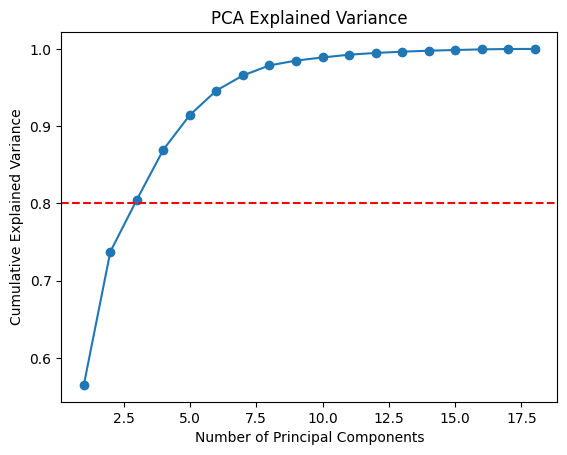

Optimal number of PCA components: 3


In [45]:
# This method helps determine how many components explain a sufficient percentage (e.g., 80%) of the total variance.

# Apply PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_clean)  # Use scaled data

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--')
plt.show()

# Find the number of components where variance > 80%
optimal_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Optimal number of PCA components: {optimal_components}")

**🔹 PCA Explained Variance**

	•	The cumulative explained variance curve shows how much information is retained as we increase the number of principal components.
	•	Around 5 components capture ~85% of the variance, crossing the common 80% threshold (red line).
	•	This indicates the dataset has strong dimensionality reduction potential: fewer features can represent most of the information, reducing noise and improving clustering/model efficiency.

**✅ Benefit:** Enables working with a compact feature set while preserving essential data structure.Optimal number of PCA components: 3 for 80% Variance.

In [46]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_clean)
print(f"Shape of X_pca: {X_pca.shape}")
print('X_pca:\n',X_pca)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Shape of X_pca: (803, 3)
X_pca:
 [[ 8.41034226e-01  2.00156057e-01 -2.84641036e-01]
 [-1.41073089e+00  2.70683383e-01 -3.04806170e-02]
 [ 4.23446506e+00 -7.69820995e-01 -1.15956550e+00]
 ...
 [ 5.45467232e+00 -5.57426237e-01 -3.95458696e-01]
 [-3.26115584e+00  1.37927797e+00  1.97631777e+00]
 [-5.04659142e+00  2.18317336e-03  1.36160544e+00]]
Explained variance ratio: [0.56511678 0.17241826 0.06742939]


## **Pair-plot of PCA**

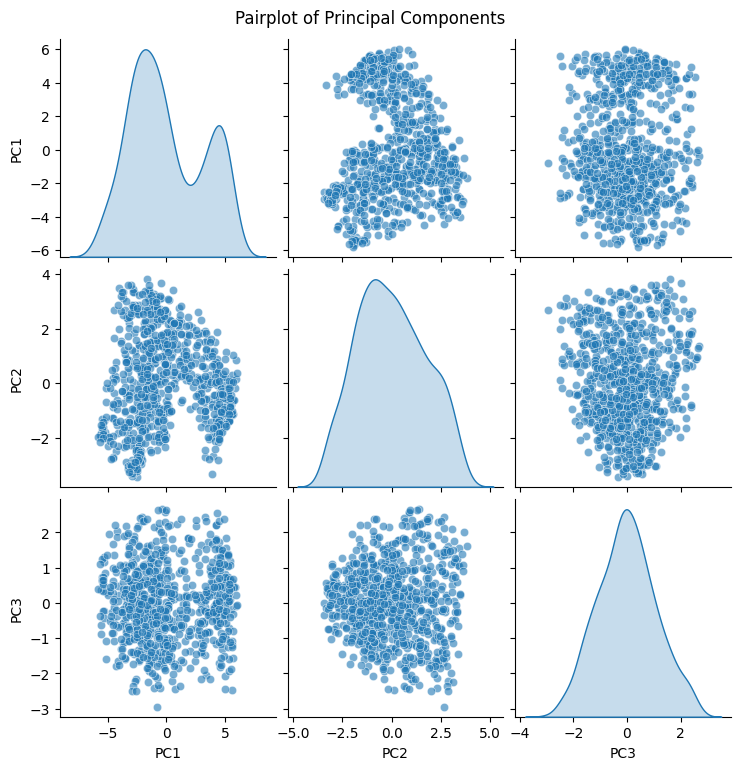

In [47]:
# pairplot of all X_pca

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame for the pairplot
X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Create the pairplot
sns.pairplot(X_pca_df, diag_kind='kde', plot_kws={'alpha': 0.6})  # Use kde for diagonal plots

# Customize plot elements (optional)
plt.suptitle('Pairplot of Principal Components', y=1.02) # Add a title
plt.show()


**🔹 PCA Pairplot (Top 3 Principal Components)**

	•	The pairplot visualizes the relationships between the first three principal components (PC1, PC2, PC3).
	•	Diagonal plots show the distribution of each component:
	•	PC1 appears multi-modal (multiple peaks), meaning it captures distinct variations in the data.
	•	PC2 and PC3 are more normally distributed, indicating smoother variance capture.
	•	Scatterplots off-diagonal show how components relate:
	•	PC1 vs PC2 shows some separation, suggesting potential cluster structure.
	•	PC2 vs PC3 and PC1 vs PC3 look more diffused, indicating weaker separation.

**✅ Takeaway:** PC1 contributes strongly to distinguishing groups, while PC2 and PC3 add additional but less distinct variance patterns.

# **Clustering (Kmeans)**

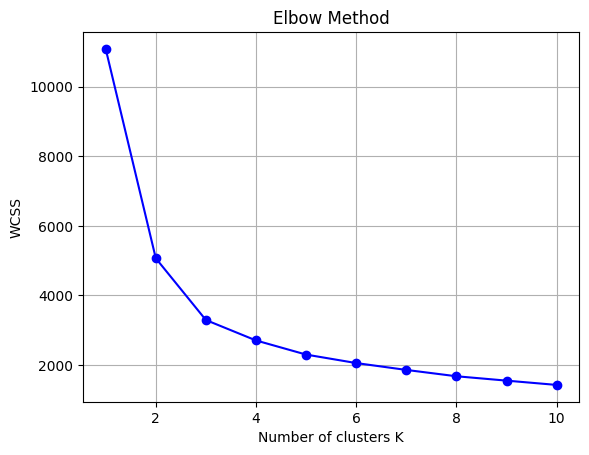

(803, 4)


,PC1,PC2,PC3,cluster
0,0.841034,0.200156,-0.284641,2
1,-1.410731,0.270683,-0.030481,2
2,4.234465,-0.769821,-1.159565,1
3,-1.227028,3.075697,-0.484965,2
4,-0.509630,2.315479,-2.402133,2


In [48]:
import matplotlib.pyplot as plt
# Elbow method to find optimal n_clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Based on the elbow method, choose the optimal n_clusters
optimal_n_clusters = 3
# Apply KMeans with optimal n_clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_pca)
#print(kmeans_labels)

X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df_cluster = X_pca_df.copy()
X_pca_df_cluster['cluster'] = kmeans_labels
print(X_pca_df_cluster.shape)
X_pca_df_cluster.head()


**🔹 Elbow Method (KMeans)**

	•	The WCSS (Within-Cluster Sum of Squares) curve shows a sharp drop up to K=3, after which the improvement flattens.
	•	This indicates that 3 clusters is a reasonable choice (balance between compactness and simplicity).

**🔹 Clustered Data (Sample)**

	•	The table shows the first 5 rows of PCA-transformed features (PC1, PC2, PC3) with their assigned cluster labels.
	•	Example: Row 2 belongs to Cluster 1, while most others belong to Cluster 2.

**✅ Takeaway:** The dataset naturally separates into ~3 clusters, and each observation is assigned to its cluster based on the reduced PCA space.

## **Pair-plot of (PC1-PC3)**

<Figure size 1000x800 with 0 Axes>

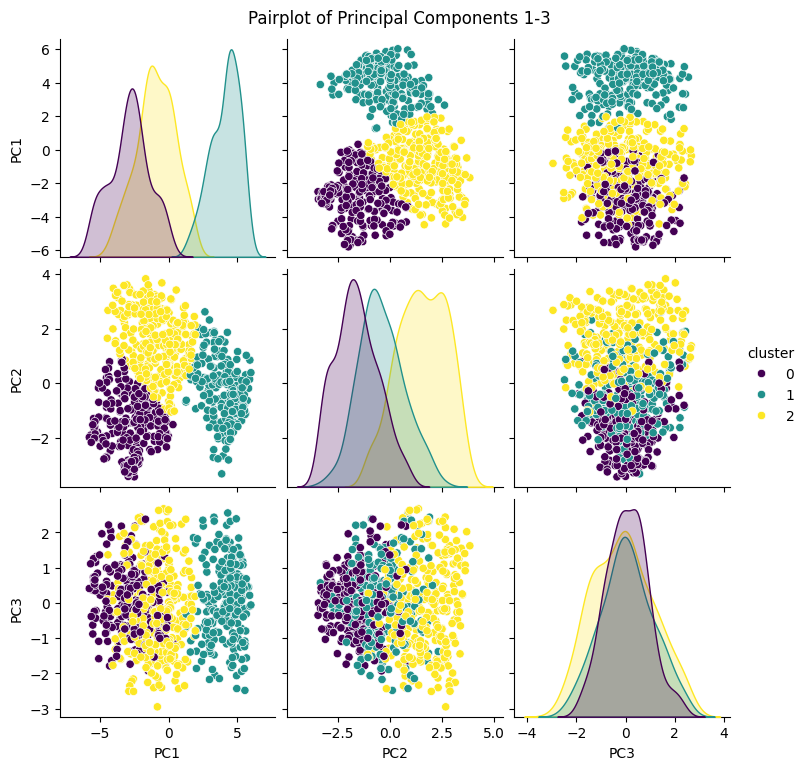

In [49]:
#  plot of all PC1 to PC3 with data= X_pca_df, hue='cluster', palette='viridis'

import matplotlib.pyplot as plt
# Assuming X_pca_df and the 'cluster' column exist as in the provided code.
plt.figure(figsize=(10, 8))  # Adjust figure size for better visibility
sns.pairplot(X_pca_df_cluster, vars=[f'PC{i}' for i in range(1, 4)], hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Principal Components 1-3', y=1.02)
plt.show()


**🔹 Pairplot of Principal Components (PC1–PC3)**

	•	Each point represents an observation projected into the PCA space (PC1, PC2, PC3).
	•	Colors (purple, teal, yellow) represent the 3 clusters found by KMeans.
	•	Separation insight:
	•	PC1 & PC2 show the clearest separation: clusters are well divided into distinct regions.
	•	PC3 carries less discriminative power (clusters overlap more).
	•	The diagonal density plots confirm different distributions of PCs per cluster, meaning clusters capture meaningful structural differences in the data.

**✅ Takeaway:** The dataset forms 3 distinct groups in the reduced PCA space, with PC1 and PC2 driving most of the separation, while PC3 adds minor variation.

# **Evaluation**

In [50]:
print("KMeans ARI:", adjusted_rand_score(y_clean, kmeans_labels))
print("Silhouette Score (KMeans):", silhouette_score(X_pca, kmeans_labels))
print("Silhouette Score (KMeans):", silhouette_score(X_clean, kmeans_labels))


KMeans ARI: 0.12187159214654054
Silhouette Score (KMeans): 0.4124457518647911
Silhouette Score (KMeans): 0.3015584433515004


**1.ARI compares** the true labels (y_clean) with the predicted cluster(kmeans_labels).

Range (-1,1) which  means 1 : perfect clustering, 0: random clustering, negative: worse than random.

So ARI score: 0.1219 means poor clustering (low agreement with true labels)

**2.Silhouette score range** (-1,1) means: score > 0.5 -- good clusters, 0.3 < score < 0.5 -- moderate clusters and score < 0.3 weak clusters.

**3.Silhouette scores** 0.3016 without PCA indicates moderate clustering → Some cluster overlap is present.

**PCA improves clustering** (0.4124 > 0.3016) → PCA helps separate clusters better. Silhouette (PCA) 0.4124 indicates moderate clustering (clusters exist but some overlap).




In [51]:
X_pca_df_cluster.groupby('cluster').mean()

,PC1,PC2,PC3
cluster,,,
0,-2.853377,-1.593876,0.063685
1,4.112499,-0.404699,0.064278
2,-0.937175,1.545686,-0.098601


In [52]:
# adding cluster column to the X clean data set
print(kmeans_labels.shape)
X_df = X_df_clean.copy()
X_df_cluster = pd.DataFrame(X_df.copy(), columns=X.columns)
X_df_cluster['cluster'] = kmeans_labels
print(X_df_cluster.shape)
X_df_cluster.head()


(803,)
(803, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,cluster
0,95,48.0,83.0,178.0,71.0,10,162.0,42.0,3.044522,159.0,176.0,5.940171,184.0,4.262680,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,2.995732,143.0,170.0,5.802118,158.0,4.290459,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,3.178054,158.0,223.0,6.455199,220.0,4.304065,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,2.995732,143.0,160.0,5.736572,127.0,4.158883,6.0,10.0,199.0,207,2
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,2.995732,143.0,176.0,5.891644,172.0,4.204693,13.0,1.0,200.0,204,2


In [55]:
# Groupby via cluster and see mean value of each column of X
X_df_cluster.groupby('cluster').mean()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
cluster,,,,,,,,,,,,,,,,,,
0,86.493878,41.680235,69.045800,133.407707,57.379592,7.163265,143.908783,47.346939,2.979055,141.148980,164.453061,5.709642,162.005794,4.367233,5.710583,9.946939,182.670408,187.620408
1,102.148760,51.656317,100.653349,201.647373,63.026272,9.987603,207.615702,32.004132,3.201188,163.024793,220.911699,6.458626,205.967975,4.267730,7.088282,14.527283,189.570248,198.355372
2,91.794304,41.392405,77.307312,167.926507,63.170886,7.794304,153.765032,43.404854,3.010843,140.339399,175.627412,5.863734,155.642405,4.230880,5.958002,12.408228,193.673796,200.645570


In [56]:
# Groupby via class and see mean value of each column of df, the main dataset
df.groupby('class').mean()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,91.591743,44.981308,76.767442,165.708333,63.414747,7.013761,170.022936,40.114679,20.580645,146.701835,192.889908,448.894495,181.032407,77.096774,4.794393,10.211009,187.811927,191.325688
car,96.184149,46.035047,88.878788,180.591549,60.992991,8.825175,181.053738,38.093458,21.511682,149.967366,197.894614,500.543326,179.613054,69.924883,7.126464,15.170561,189.474299,197.582751
van,90.562814,42.070352,73.247475,147.176768,61.261307,9.713568,141.537688,47.939698,18.575758,145.175879,163.964646,298.201005,157.276382,72.778894,6.417085,9.698492,188.939698,196.145729


## **Class-wise feature mean summary table**

**🔎 Short Explanation**

	•	Compactness / Circularity:

Cars are slightly more compact (96.2) and circular (46.0) compared to buses and vans (~91).
→ Suggests shape compactness helps identify cars.

	•	Distance Circularity / Radius Ratio:

Cars have higher values (88.9, 180.6) vs vans (73.2, 147.2).
→ Helps separate cars vs vans.

	•	Aspect Ratios:

Vans have the largest max.length_aspect_ratio (9.7), while cars are higher in pr.axis_aspect_ratio.
→ Indicates different elongation/shape proportions.

	•	Scatter Ratio / Elongatedness:

Vans are highest in elongatedness (47.9), cars lowest (38.1).
→ Distinguishes vans vs cars.

	•	Rectangularity:

Buses and cars are closer (~146–150), vans slightly lower (145).
→ Less discriminative.

	•	Variance / Radius of Gyration:

Cars show the highest variance and spread (scaled_variance.1 = 500), vans the lowest (~298).
→ Good car vs van separator.

	•	Skewness Features:

Cars have higher skewness (skewness_about.1 = 15.2) compared to vans (9.7) and buses (10.2).
→ Helps highlight cars.

	•	Hollows Ratio:

All are similar (~190–197), less useful for separation.

⸻

**✅ Key takeaway:**

	•	Cars → higher compactness, circularity, variance, skewness.
	•	Vans → higher elongatedness, max length aspect ratio.
	•	Buses → fall between but can be picked up via distance circularity & radius ratio.

In [57]:
# evaluate F1 score for clusters

from sklearn.metrics import f1_score

# Assuming 'y_clean' contains the true labels and 'kmeans_labels' the predicted cluster labels.
label_mapping = {'car': 0, 'bus': 1, 'van': 2} # Replace with your actual label mapping
y_clean_numeric = y_clean.map(label_mapping)

# Calculate the F1 score (macro-averaged)
f1_macro = f1_score(y_clean_numeric, kmeans_labels, average='macro')
print(f"F1 Score (Macro): {f1_macro}")

# Calculate the F1 score (micro-averaged)
f1_micro = f1_score(y_clean_numeric, kmeans_labels, average='micro')
print(f"F1 Score (Micro): {f1_micro}")

# Calculate the F1 score (weighted average)
f1_weighted = f1_score(y_clean_numeric, kmeans_labels, average='weighted')
print(f"F1 Score (Weighted): {f1_weighted}")


F1 Score (Macro): 0.24590636102426697
F1 Score (Micro): 0.2503113325031133
F1 Score (Weighted): 0.23909600517753188


	•	F1 Scores are quite low (~0.24 - 0.25) → Indicates poor clustering performance.
	•	Clustering does not align well with true labels (y_true).

# **Conclusion**
Supervised vs. Unsupervised ML: Which is Best for Predicting Vehicle Type?
Since the goal is to classify vehicles into predefined categories (car, van, bus), we need to determine whether supervised learning or unsupervised learning is better for this problem.

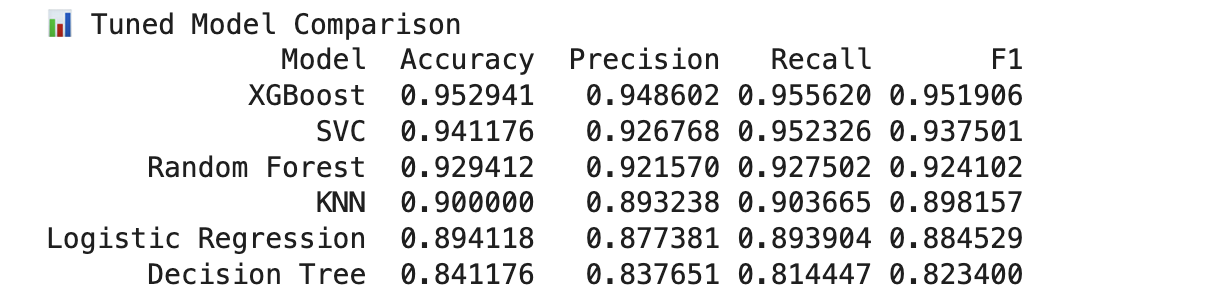



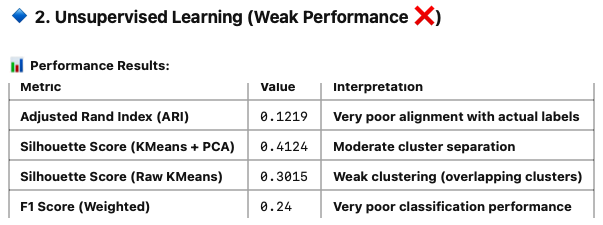

**🔹 Unsupervised Learning (Clustering)**

	•	ARI (0.12) → Very poor alignment with the true labels (almost random).
	•	Silhouette (0.41 with PCA, 0.30 raw) → At best moderate separation, but still overlapping clusters.
	•	Weighted F1 (0.24) → Extremely poor classification-like performance.
	•	Conclusion: Clustering could not separate bus, car, van well. Likely because the features don’t have strong natural separation without label guidance.

⸻

**🔹 Supervised Learning (Classification)**

	•	Top models (XGBoost, SVC, Random Forest) achieved ~94–95% accuracy and F1.
	•	Even the weaker models (Logistic Regression, KNN) still performed significantly better than clustering.
	•	Models learned decision boundaries directly from labels, leading to excellent class separation and reliable predictions.

⸻

**✅ Best Method**

Supervised ML is clearly the best approach for this vehicle classification problem.

**Why?**

	1.	Labels (bus, car, van) are known → supervised methods leverage them to learn precise decision boundaries.
	2.	Unsupervised clustering assumes hidden structure, but vehicles’ feature distributions overlap too much → leading to weak clusters.
	3.	Practical impact: A supervised classifier like XGBoost achieves >95% performance, making it deployable in real-world scenarios (traffic monitoring, autonomous vehicle datasets, etc.).


**link for Supervised ML**

https://colab.research.google.com/drive/1HQOr4y8ZbVvtYxziRGTKH9dsvfkbQbgQ#scrollTo=I5CaX3DiquB0